In [ ]:
SANDBOX_NAME = 'farg' # Sandbox Name
DATA_PATH = "/data/sandboxes/"+SANDBOX_NAME+"/data/all_data/"



Antes de utilizar este notebook, por favor, crea una carpeta `datasets` al mismo nivel que este notebook con los ficheros CSV `pokemon.csv`, `nba.csv` y `baseball.csv`



# Pandas

1. `DataFrames` y  `Series`
2. Operaciones básicas

`pandas` es una librería que proporciona herramientas analíticas y estructuras de datos con alto rendimiento y facilidad de uso. En particular, la clase `DataFrame` es útil para representación y manipulación de datos heterogéneos tabulados (hojas de cálculo, tabla SQL, etc.)   

## Características
- Ofrece estructuras de datos flexibles y expresivas diseñadas para trabajar con datos tabulados y etiquetados, esta son: `Series` y  `DataFrame`.
- Posee herramientas robustas de lectura/escritura de datos desde ficheros con formatos conocidos como: CSV, XLS. SQL, HDF5, entre otros.
- Permite filtrar, agregar, o eliminar datos.
- Combina las características de las matrices de alto rendimiento de `numpy` con capacidades de manipulación de datos tabulados.

Para importar los módulos de la librería `pandas`, por convención se utiliza:

In [ ]:
import pandas as pd
import numpy as np



## DataFrames y Series

Las funcionalidades de `pandas` se basan en dos estructuras de datos fundamentales: *Series* y *DataFrames*.

Una `Series` es un objeto que contiene un `array` unidimensional de datos y un `array` de etiquetas, conocido como *índice*. Si no se especifica un índice o etiqueta, este se genera internamente como una secuencia ordenada de números enteros.

```python
s = pd.Series(data, index=index)
```

Un `DataFrame` es una estructura de datos que almacena datos de forma tabular, es decir, ordenada en filas y columnas etiquetadas. Cada fila (`row`) contiene una observación y cada columna (`column`) una variable. Un `DataFrame` acepta datos heterogéneos, es decir, variables pueden ser de distinto tipo (numérico, string, boolean, etc.). Además de contener datos, un `DataFrame` contiene el nombre de las variables y sus tipos, y métodos que permiten acceder y modificar los datos.

```python
s = pd.DataFrame(data, ...)
```

Las `Series` y `DataFrame` permiten representar datos 1D y 2D. Para representar datos con más dimensiones `pandas` posee otras estructuras de datos más complejas (en fase experimental), llamadas `Panel`, `Panel4D`, `PanelND`. Estas estructuras están fuera del alcance de este curso.



---
# Series en Pandas

## Creación de Series




Crear una Series con índices automáticos a partir de una lista

In [ ]:
serie = pd.Series([1979, 1980, 1981, 1982])
serie

0    1979
1    1980
2    1981
3    1982
dtype: int64



Las `Series` poseen dos atributos: `values`  e `index`. El primero es un `numpy array` que almacena los datos, y el segundo es un objeto que contiene los índices.

In [ ]:
serie.values

array([1979, 1980, 1981, 1982])

In [ ]:
serie.index

RangeIndex(start=0, stop=4, step=1)

array([1980, 1981])



Al crear una `Series` se puede definir explícitamente un `array` índice y pasarlo como argumento.



Crear Series con índices definidos

In [ ]:
serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'martha', 'nicky', 'theresa', 'nicky'])
serie

carolina    1979
martha      1980
nicky       1981
theresa     1982
nicky       1983
dtype: int64

In [ ]:
serie.sort_index()[3:]

nicky      1983
theresa    1982
dtype: int64

In [ ]:
import string

letters = string.ascii_lowercase

In [ ]:
# Generar 1000 llaves de tamanio 3 tomando muestras de letters
# Generar 1000 enteros aleatorios entre 0 y 100 
# Con esto construir una serie
# - Verificar cuanto tiempo tarda filtrar todos los valores que empiezan con 'a'
# - Ordenar indice y verificar cuanto tiempo toma filtrar todos los valores que empiezan con 'a'

'abcdefghijklmnopqrstuvwxyz'

In [ ]:
m = 1000
index = [''.join(np.random.choice(list(letters), 4)) for _ in range(m)]
values = np.random.randint(0, 100, 1000)
my_series = pd.Series(data=values, index=index)

In [ ]:
my_series.sort_index().loc['aa':'az']

aako    36
aano    31
abor    48
abug    13
abvz    64
aclc     7
aclt    71
aegx    27
aezi    44
agsp    17
aibu    56
akxv    77
aleh    87
alqh    57
ankm    47
aobj    81
aolh    34
aowu    63
apru    91
aqlw    86
arfu    61
arof    26
atll     4
auiz    19
aujq    76
aumd    31
avex    81
avkg     0
avrb    79
awxn    48
axbd    63
axck    91
axvv    18
axxh    35
ayni    26
aypv    84
dtype: int64



También se pueden crear `Series` a partir de diccionarios, `numpy arrays`, desde ficheros, etc.



Serie a partir de un numpy array

In [ ]:
serie = pd.Series(np.random.randn(10))
serie

0   -0.612682
1   -0.376621
2    1.501596
3   -1.676604
4    0.176151
5    1.052789
6    1.575458
7   -1.026583
8   -0.641532
9    0.423338
dtype: float64



Serie a partir de un diccionario

In [ ]:
dicc = {'cuadrado de {}'.format(i): i * i for i in range(11)}
print(dicc)

{'cuadrado de 0': 0, 'cuadrado de 1': 1, 'cuadrado de 2': 4, 'cuadrado de 3': 9, 'cuadrado de 4': 16, 'cuadrado de 5': 25, 'cuadrado de 6': 36, 'cuadrado de 7': 49, 'cuadrado de 8': 64, 'cuadrado de 9': 81, 'cuadrado de 10': 100}


In [ ]:
serie_dicc = pd.Series(dicc)
serie_dicc

cuadrado de 0       0
cuadrado de 1       1
cuadrado de 2       4
cuadrado de 3       9
cuadrado de 4      16
cuadrado de 5      25
cuadrado de 6      36
cuadrado de 7      49
cuadrado de 8      64
cuadrado de 9      81
cuadrado de 10    100
dtype: int64



Serie a partir de fichero
Al asignar una columna y el squeeze a True convierte el resultado en Series en lugar de Dataframe

In [ ]:
print(DATA_PATH)

/data/sandboxes/farg/data/all_data/


In [ ]:
#serie_pokemon = # pd.read_csv('datasets/pokemon.csv',squeeze=True, usecols=['Name'])
#serie_pokemon
serie_pokemon = spark.read.csv(DATA_PATH + 'pokemon_workshop/pokemon.csv', 
                               header=True, 
                               sep=',', 
                               inferSchema=True).toPandas()
serie_pokemon = serie_pokemon.set_index('Name').Attack

In [ ]:
serie_pokemon.value_counts()

100    40
65     39
80     37
50     37
85     33
       ..
121     1
128     1
74      1
129     1
190     1
Name: Attack, Length: 111, dtype: int64



---
## Acceso a datos en Series




El acceso a los datos se puede realizar mediante el índice categórico o el numérico que genera internamente Pandas



Creamos de nuevo la serie inicial

In [ ]:
serie = pd.Series(data=[1979, 1980, 1981, 1982, 1983],
                  index=['carolina', 'martha', 'nicky', 'theresa', 'nicky'])
serie

carolina    1979
martha      1980
nicky       1981
theresa     1982
nicky       1983
dtype: int64



Indexación mediante etiqueta

In [ ]:
print(serie['martha'])

1980




Indexación mediante índice numérico interno

In [ ]:
print(serie[1])

1980




El índice puede contener valores duplicados

In [ ]:
print(serie['nicky'])

nicky    1981
nicky    1983
dtype: int64


In [ ]:
a = pd.Series([1, 5, 6, 7], index=['a', 'b', 'c', 'd'])
b = pd.Series([7, 6, 4, 3], index=['f', 'a', 'a', 'b'])
print(a)
print(b)
a + b

a    1
b    5
c    6
d    7
dtype: int64
f    7
a    6
a    4
b    3
dtype: int64


a    7.0
a    5.0
b    8.0
c    NaN
d    NaN
f    NaN
dtype: float64



Podemos seleccionar varios valores indicando un intervalo de índices



Recuperamos desde el valor de la posición 1 (el primer elemento tiene un index = 0) hasta el final del índice.

In [ ]:
serie[1:]

martha     1980
nicky      1981
theresa    1982
nicky      1983
dtype: int64



Recuperamos los elementos desde la posición 1 a la 2

In [ ]:
serie[1:3]

martha    1980
nicky     1981
dtype: int64



Podemos usar también índices negativos

In [ ]:
serie[-4:-2]

martha    1980
nicky     1981
dtype: int64

In [ ]:
serie.sort_index().loc['n':]

nicky      1981
nicky      1983
theresa    1982
dtype: int64



---
## Métodos en Series



Para **añadir** nuevos elementos a una Series usamos el método `append`:

In [ ]:
s1 = pd.Series(np.arange(10))
s2 = pd.Series(np.arange(10, 21))

s3 = s1.append(s2)
s3

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
0     10
1     11
2     12
3     13
4     14
5     15
6     16
7     17
8     18
9     19
10    20
dtype: int64



Se mantienen los índices de cada serie

In [ ]:
s3[1]

1     1
1    11
dtype: int64



También podemos concatenar series generando un índice nuevo:

In [ ]:
s3 = s1.append(s2, ignore_index=True)
s3

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
20    20
dtype: int64

In [ ]:
s3[1]

1



set_value edita el contenido del índice indicado o añade un nuevo item si no existe el índice

In [ ]:
s1[5:10] = max(s1.index)

In [ ]:
s1

0    0
1    1
2    2
3    3
4    4
5    9
6    9
7    9
8    9
9    9
dtype: int64



El méotdo pop devuelve y elimina de la serie original el valor del índice pasado

In [ ]:
b_pokemon = serie_pokemon.pop('Blissey')

In [ ]:
b_pokemon

10

In [ ]:
s4 = s1.pop(3)
print(s4)
print(s1)

3
0    0
1    1
2    2
4    4
5    9
6    9
7    9
8    9
9    9
dtype: int64




Ordena los valores, por defecto de menos a más.

In [ ]:
serie_pokemon.sort_values()

Name
Chansey                 5
Happiny                 5
Shuckle                10
Magikarp               10
Feebas                 15
                     ... 
Mega Rayquaza         180
Primal Groudon        180
DeoxysAttack Forme    180
Mega Heracross        185
Mega Mewtwo X         190
Name: Attack, Length: 799, dtype: int64



Ordenamos de forma descendente

In [ ]:
serie_pokemon.sort_values(ascending=False)

Name
Mega Mewtwo X         190
Mega Heracross        185
DeoxysAttack Forme    180
Primal Groudon        180
Mega Rayquaza         180
                     ... 
Feebas                 15
Magikarp               10
Shuckle                10
Happiny                 5
Chansey                 5
Name: Attack, Length: 799, dtype: int64



Para que los cambios modifique realmente la serie hay que indicarlo mediante el parámetro inplace

In [ ]:
serie_pokemon

Name
Bulbasaur          49
Ivysaur            62
Venusaur           82
Mega Venusaur     100
Charmander         52
                 ... 
Diancie           100
Mega Diancie      160
Hoopa Confined    110
Hoopa Unbound     160
Volcanion         110
Name: Attack, Length: 799, dtype: int64

In [ ]:
pokemon = serie_pokemon.copy()

In [ ]:
pokemon.sort_values(inplace=True)
pokemon

Name
Chansey                 5
Happiny                 5
Shuckle                10
Magikarp               10
Feebas                 15
                     ... 
Mega Rayquaza         180
Primal Groudon        180
DeoxysAttack Forme    180
Mega Heracross        185
Mega Mewtwo X         190
Name: Attack, Length: 799, dtype: int64



Si queremos ordernar mediante el índice recurrimos a sort_index()

In [ ]:
serie_pokemon.sort_index()

Name
Abomasnow                 92
Abra                      20
Absol                    130
Accelgor                  70
Aegislash Blade Forme    150
                        ... 
Zorua                     65
Zubat                     45
Zweilous                  85
Zygarde Half Forme       100
NaN                      105
Name: Attack, Length: 799, dtype: int64



Nos devuelve el número de items de cada elemento

In [ ]:
serie_pokemon.value_counts()

100    40
65     39
80     37
50     37
85     33
       ..
121     1
128     1
74      1
129     1
190     1
Name: Attack, Length: 111, dtype: int64

<AxesSubplot:ylabel='Density'>

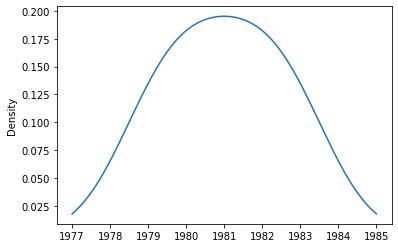

In [ ]:
serie.plot.kde()



El método apply permite aplicar una función a todos los elementos de la serie.

In [ ]:
p_series.apply(lambda x: len(x) if x else x)

0       9.0
1       7.0
2       8.0
3      13.0
4      10.0
       ... 
794     7.0
795    12.0
796    14.0
797    13.0
798     9.0
Name: Name, Length: 799, dtype: float64

obtener una serie con el numero de vocales unicas por nombre de pokemon

In [ ]:
p_series = pd.Series(serie_pokemon.index)
p_series

0           Bulbasaur
1             Ivysaur
2            Venusaur
3       Mega Venusaur
4          Charmander
            ...      
794           Diancie
795      Mega Diancie
796    Hoopa Confined
797     Hoopa Unbound
798         Volcanion
Name: Name, Length: 799, dtype: object



Para ver información adicional de un método

In [ ]:
p_series[p_series.apply(lambda x : len(set(x.lower()) & set('aeiou')) if x else x).idxmax()]

'Mega Lucario'



Muestra una lista de funciones del objeto Series

In [ ]:
dir(serie_dicc)

['T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__



---
# Dataframes en Pandas

## Creación de Dataframes

A diferencia de `Series`, los `DataFrame` están diseñados para almacenar datos heterogéneos multivariables. Por ejemplo:



Índice de filas automático

In [7]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
        'year': [2000, 2001, 2002, 2001, 2002],
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9]}
df = pd.DataFrame(data)
df

NameError: ignored

In [8]:
df.values

NameError: ignored

In [ ]:
import numpy as np
import pandas as pd



DataFrame a partir de un diccionario de listas e índice

In [ ]:
df = pd.DataFrame({'nombre': ['Pablo', 'Teresa'],
                   'score': [22.2, 33.3]},
                  index=['pacunar', 'tono'])
df



Dataframe a partir fichero

In [ ]:
nba = spark.read.csv(DATA_PATH + 'nba.csv', inferSchema=True, sep=',', header=True).toPandas()
nba

In [ ]:
nba.birth_state.value_counts().sort_values(ascending=False).head().plot.barh()

In [ ]:
print(nba.height.mean())
print(nba.height.std())

In [ ]:
nba.weight.plot.hist()

In [ ]:
nba.index



Se pueden consultar el nombre de las variables usando el atributo `columns`

In [ ]:
nba.columns



Adicionalemnte `Pandas` permite crear Dataframes a partir de otras fuentes, como son jsons, urls...



---
## Acceso a datos en Dataframes




Se pueden extraer columnas de un `DataFrame` con la etiqueta de la columna (sólo si es un identificador Python válido)  usando notación tipo diccionario o como atributo del objeto. En ambos casos se obtiene un objeto tipo `Series`.

In [ ]:
nba['Player']  # dict type

In [ ]:
nba.Player  # attribute type



Mediante la notación de dobles [] obtenemos un Dataframe en lugar de una Serie

In [ ]:
nba= nba.set_index('Player')
nba

In [ ]:
nba.loc['Ed Bartels']

In [ ]:
type(nba.Player), type(nba['Player']), type(nba[['Player']])



Podemos recuperar varias columnas a la vez

In [ ]:
nba[['Player','height']].iloc[3917]



Para acceder a las filas, se puede usar el atributo `ix` o la función `iloc`.



**Nota**: Consultad http://pandas.pydata.org/pandas-docs/version/0.18.1/indexing.html#different-choices-for-indexing para entender diferencias entre los métodos.



Permite acceder al contenido de un registro mediante la etiqueta del índice

In [ ]:
df.loc['tono']



Permite acceder al contenido de un registro mediante la posición del índice

In [ ]:
df.iloc[1]



Podemos acceder a un valor concreto usando el acceso a datos visto anteriormente en Series

In [ ]:
df.iloc[1]['score']



---
## Métodos en Dataframes


Vemos algunos métodos útiles de la clase Dataframe

In [ ]:
import pandas as pd
data = spark.read.csv(DATA_PATH + 'baseball.csv', sep=',', header=True, inferSchema=True).toPandas()
data.head()

In [ ]:
# Top 5 jugadores con mas h. 
(data
 .assign(player = (data
                   .player
                   .apply(lambda x: re.sub(r'[^a-z]+', r'', x))))
 .assign(player_upper = data.player.str.upper()))
# .set_index('player1')).head()
# .h   
# .sort_values(ascending=False)
# .head(n=5))



Nos indica el número de columnas y filas del dataframe

In [ ]:
data.shape

In [ ]:

data.values



Devuelve los n primeros registros (5 por defecto)

In [ ]:
data.head()



Devuelve los n primeros registros (5 por defecto)

In [ ]:
data.tail(3)



Devuelve un resumen estadístico de las variables

In [ ]:
data.describe()



Devuelve un resumen de la estructura

In [ ]:
data.info()



Devuelve una lista con las etiquetas de las columnas y de las filas

In [ ]:
data.axes



Devuelve el número de elementos únicos por campo

In [ ]:
data.nunique()



# Ejercicios

Considere el siguiente diccionario `data` y lista de `index`

In [1]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

NameError: ignored



- a. Crea un DataFrame a partir del diccionario y los índices.
- b. Selecciona las columnas `animal`y `age`.
- c. Indique cuantos tipos distintos de animales hay.
- d. Indique cuantos animales hay de cada tipo.
- e. Muestre un resumen estadístico de todas las variables.



##### Solución Ejercicio 1



Crea un DataFrame a partir del diccionario y los índices.

In [2]:
# Respuesta aqui



Selecciona las columnas `animal`y `age`.


In [3]:
# Respuesta aqui



Indique el número de animales distintos.


In [4]:
# Respuesta aqui



Indique cuantos animales hay de cada tipo.


In [5]:
# Respuesta aqui



Muestre un resumen estadístico de todas las variables.


In [6]:
# Respuesta aqui